In [2]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!python3 --version

In [5]:
# 사용자 제공 데이터 로드
train_data = pd.read_csv('/mnt/data/train.csv')
test_data = pd.read_csv('/mnt/data/test.csv')

# 입력 변수와 타겟 변수 분리
X_train = train_data.drop(columns=['ID', 'y'])  # 타겟 변수를 제외한 입력 데이터
y_train = train_data['y']  # 타겟 변수
X_test = test_data.drop(columns=['ID'])  # 테스트 데이터

lgb_train = lgb.Dataset(X_train, label=y_train)

In [6]:
# 하이퍼파라미터 설정
params = {
    'objective': 'regression',  # 회귀 문제일 경우
    'metric': 'rmse',  # 평가 지표 (RMSE)
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'learning_rate': 0.1,  # 학습률
    'num_leaves': 31,  # 하나의 트리에서 사용할 수 있는 최대 리프 개수
    'max_depth': -1,  # 트리의 최대 깊이 (제한이 없을 경우 -1)
    'feature_fraction': 0.9,  # 학습에 사용할 피처의 비율
    'bagging_fraction': 0.8,  # 샘플링에 사용할 비율
    'bagging_freq': 5,  # 몇 번째 트리마다 다시 샘플링할지 결정
    'verbose': -1  # 출력 설정
}

# 모델 학습
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,  # 최대 1000번 트리를 생성
    valid_sets=[lgb_train],  # 검증 데이터셋
    early_stopping_rounds=10  # 10번 동안 성능이 개선되지 않으면 멈춤
)

RMSE: 0.1698388005517333


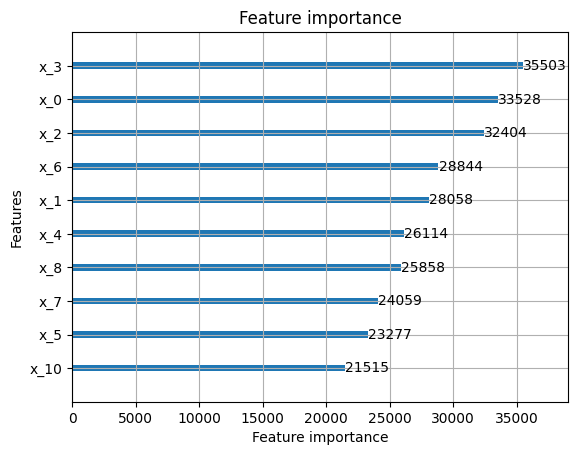

In [7]:
# 예측 수행
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# 피처 중요도 그래프
lgb.plot_importance(model, max_num_features=10)  # 중요도 상위 10개 피처
plt.show()

In [8]:
# 저장
model.save_model('lightgbm_model.txt')

submission = pd.DataFrame({'ID': test_data['ID'], 'y_pred': y_pred})
submission.to_csv('/mnt/data/submission.csv', index=False)